---------

# Exploratory Data Analysis:

- Importing labraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Loading Data-set:

In [3]:
food = pd.read_csv('food.tsv', sep='\t')
food = food.sample(frac=0.1)

C:\Users\thech\AppData\Local\Temp\ipykernel_15336\2664869814.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  food = pd.read_csv('food.tsv', sep='\t')


-------------------

## EDA and its important steps:

--------------------------------

### 1:- Data shape:

In [4]:
print(food.shape)
instances, series = food.shape
print('The number of instances:', instances)
print('The number of series:', series)


(35603, 163)
The number of instances: 35603
The number of series: 163


------------------------


### 2:- Data-Structure:

In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35603 entries, 70770 to 137241
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 44.5+ MB


In [6]:
food.shape[1]

163

In [7]:
food.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

-------------------------

### 3:- Finding missing values:

In [8]:
food.isnull().sum()

code                           4
url                            4
creator                        0
created_t                      0
created_datetime               3
                           ...  
carbon-footprint_100g      35570
nutrition-score-fr_100g    10102
nutrition-score-uk_100g    10102
glycemic-index_100g        35603
water-hardness_100g        35603
Length: 163, dtype: int64

- Percentage calculation of missing value:

In [9]:
percentage_of_nan = food.isnull().sum().sort_values(ascending=False)/food.shape[0]*100
percentage_of_nan 

water-hardness_100g                      100.000000
molybdenum_100g                          100.000000
casein_100g                              100.000000
ingredients_from_palm_oil                100.000000
ingredients_that_may_be_from_palm_oil    100.000000
                                            ...    
created_datetime                           0.008426
last_modified_datetime                     0.000000
last_modified_t                            0.000000
created_t                                  0.000000
creator                                    0.000000
Length: 163, dtype: float64

- Checking how many features have 100% missing values

In [10]:
futile_features=percentage_of_nan[percentage_of_nan>=40].index
futile_features

Index(['water-hardness_100g', 'molybdenum_100g', 'casein_100g',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       'nutrition_grade_uk', '-maltose_100g', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g',
       ...
       'pnns_groups_1', 'pnns_groups_2', 'vitamin-a_100g', 'iron_100g',
       'vitamin-c_100g', 'calcium_100g', 'trans-fat_100g', 'cholesterol_100g',
       'additives_tags', 'additives_en'],
      dtype='object', length=129)

- Dropping futile features

In [11]:
food.drop(futile_features, axis=1, inplace=True)


- Checking features with no missing values

In [12]:
features_with_no_nan=percentage_of_nan[percentage_of_nan==0].index
features_with_no_nan

Index(['last_modified_datetime', 'last_modified_t', 'created_t', 'creator'], dtype='object')

- Splitting dataset into three categories based on NaN values

In [ ]:
low_nan_features=percentage_of_nan[percentage_of_nan<=15].index
middle_nan_features=percentage_of_nan[(percentage_of_nan>15) & (percentage_of_nan<40)].index
high_nan_features=percentage_of_nan[percentage_of_nan>40].index


--------------

### 4:- Type casting

In [24]:
food['last_modified_datetime'].dtype

dtype('O')

In [26]:
food['last_modified_datetime']=food['last_modified_datetime'].astype(str)

-------------

### 5:- Splitting categorical variable into numerical

In [28]:
food.last_modified_datetime.str.split('T',expand=True)

,0,1
70770,2017-03-09,12:39:10Z
56435,2017-03-09,14:48:00Z
45961,2017-03-09,14:44:11Z
167185,2017-03-09,13:17:47Z
20090,2017-03-09,12:02:40Z
...,...,...
172340,2017-03-09,20:41:51Z
118750,2017-03-10,09:15:24Z
70185,2017-03-09,12:48:24Z
86693,2017-03-10,09:07:52Z


- Adding into new columns

In [31]:
food['last_modified_date']=food['last_modified_datetime'].str.split('T',expand=True)[0]
food['last_modified_time']=food['last_modified_datetime'].str.split('T',expand=True)[1]

---------------

## 6:- Summary of the data

In [34]:
food.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,15752.000000,15752.000000,15752.000000,15752.00000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.00000,15752.000000,15752.000000,15752.000000,15752.000000
mean,2.051486,0.015236,0.047740,1197.51131,13.065907,4.650253,35.266302,15.235423,2.886567,7.85665,1.430011,0.562991,9.026536,8.960830
std,2.636572,0.125566,0.239317,747.62310,15.295627,6.835792,28.261692,19.623968,4.468135,8.00359,16.475965,6.486584,9.028060,9.068566
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,473.00000,0.830000,0.000000,8.807500,1.600000,0.000000,2.35000,0.127000,0.050000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1255.00000,7.140000,1.760000,28.120000,5.500000,1.600000,5.80000,0.718820,0.283000,9.000000,9.000000
75%,3.000000,0.000000,0.000000,1757.00000,21.430000,6.920000,60.710000,23.955000,3.600000,10.71000,1.364615,0.537250,16.000000,16.000000
max,30.000000,2.000000,3.000000,4707.00000,100.000000,88.000000,100.000000,100.000000,60.000000,82.00000,1799.165820,708.333000,40.000000,40.000000


-----------------

## 7:- Value counts

In [35]:
food['carbohydrates_100g'].value_counts()

0.00     837
3.57     338
50.00    249
6.67     223
75.00    178
        ... 
73.44      1
6.75       1
51.89      1
15.46      1
91.00      1
Name: carbohydrates_100g, Length: 2526, dtype: int64

--------------

## 8:- Remove duplicates

In [37]:
food.drop_duplicates(inplace=True)

----------------

## 9:- Checking data normalization

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

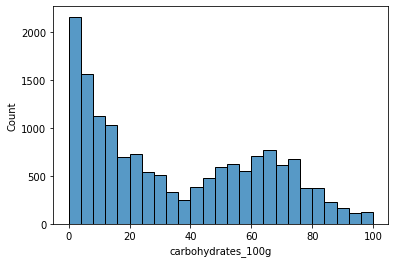

In [38]:
sns.histplot(food['carbohydrates_100g'])

- skew means how much the data is skewed to the left or right
- kurtosis is how much the data is skewed to the top or bottom

In [39]:
food['carbohydrates_100g'].agg(['skew', 'kurtosis']).transpose()
                                                                  

skew        0.380110
kurtosis   -1.217243
Name: carbohydrates_100g, dtype: float64

--------------

## 10:- Correlation Analysis

In [41]:
corr=food.corr(method="pearson")
corr

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
additives_n,1.000000,0.087379,0.287295,0.012770,-0.104433,-0.023549,0.166747,0.168458,-0.160896,-0.123339,-0.005680,-0.005679,0.168017,0.167193
ingredients_from_palm_oil_n,0.087379,1.000000,0.174391,0.072629,0.032318,0.061962,0.071044,0.045020,0.012364,-0.016466,-0.003559,-0.003559,0.068025,0.069158
ingredients_that_may_be_from_palm_oil_n,0.287295,0.174391,1.000000,0.007421,0.001551,0.036707,0.015295,0.019113,-0.038373,-0.051180,-0.006839,-0.006838,0.048457,0.047316
energy_100g,0.012770,0.072629,0.007421,1.000000,0.771595,0.551729,0.564222,0.335126,0.296714,0.320354,-0.003361,-0.003360,0.632817,0.642661
fat_100g,-0.104433,0.032318,0.001551,0.771595,1.000000,0.696459,-0.038482,-0.008467,0.158856,0.323303,0.005188,0.005188,0.573197,0.581700
saturated-fat_100g,-0.023549,0.061962,0.036707,0.551729,0.696459,1.000000,-0.014497,0.147061,-0.007993,0.213414,0.002660,0.002660,0.662759,0.668462
carbohydrates_100g,0.166747,0.071044,0.015295,0.564222,-0.038482,-0.014497,1.000000,0.625844,0.273310,-0.129367,-0.020069,-0.020069,0.270195,0.273499
sugars_100g,0.168458,0.045020,0.019113,0.335126,-0.008467,0.147061,0.625844,1.000000,-0.025751,-0.272953,-0.030076,-0.030075,0.481727,0.479468
fiber_100g,-0.160896,0.012364,-0.038373,0.296714,0.158856,-0.007993,0.273310,-0.025751,1.000000,0.245674,-0.008667,-0.008669,-0.155800,-0.151261
proteins_100g,-0.123339,-0.016466,-0.051180,0.320354,0.323303,0.213414,-0.129367,-0.272953,0.245674,1.000000,0.028497,0.028496,0.122385,0.131272


<AxesSubplot:>

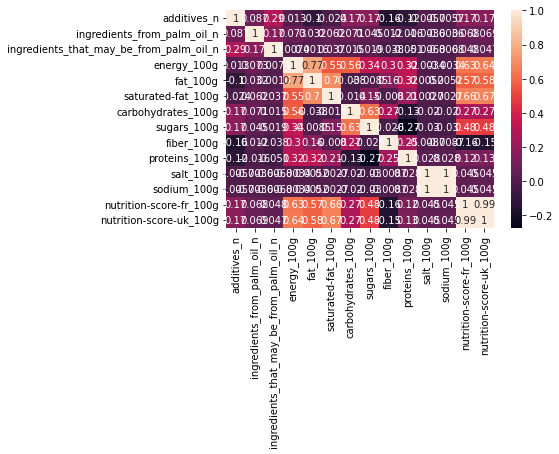

In [42]:
sns.heatmap(corr, annot=True)

---------------